In [1]:

from sklearn.metrics import accuracy_score


import pandas as pd
import numpy as np



import matplotlib.pyplot as plt
import seaborn


from sklearn.model_selection import train_test_split


In [2]:
d=pd.read_csv('deceptive-opinion.csv')

In [3]:
d.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [4]:
comb=d.drop(['hotel','polarity','source'],axis=1)

In [5]:
comb.head()

,deceptive,text
0,truthful,We stayed for a one night getaway with family ...
1,truthful,Triple A rate with upgrade to view room was le...
2,truthful,This comes a little late as I'm finally catchi...
3,truthful,The Omni Chicago really delivers on all fronts...
4,truthful,I asked for a high floor away from the elevato...


In [7]:
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer=WordNetLemmatizer()
stemmer=PorterStemmer()
def preprocess(sentence):
    sentence=str(sentence)
    sentence=sentence.lower()
    sentence=sentence.replace('{html}','')
    cleanr=re.compile('<.*?>')
    cleantext=re.sub(cleanr,'',sentence)
    rem_url= re.sub(r'http\S+','',cleantext)
    rem_num=re.sub('[0-9]+','',rem_url)
    tokenizer=RegexpTokenizer(r'\w+')
    tokens=tokenizer.tokenize(rem_num)
    filtered_words=[w for w in tokens if len(w)>2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return ' '.join(filtered_words )



comb['CleanText']=comb['text'].map(lambda s: preprocess(s))




In [8]:
comb.head()

,deceptive,text,CleanText
0,truthful,We stayed for a one night getaway with family ...,stayed one night getaway family thursday tripl...
1,truthful,Triple A rate with upgrade to view room was le...,triple rate upgrade view room less also includ...
2,truthful,This comes a little late as I'm finally catchi...,comes little late finally catching reviews pas...
3,truthful,The Omni Chicago really delivers on all fronts...,omni chicago really delivers fronts spaciousne...
4,truthful,I asked for a high floor away from the elevato...,asked high floor away elevator got room pleasa...


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
lab=LabelEncoder()

In [11]:
comb['deceptive']=lab.fit_transform(comb['deceptive'])

In [12]:
comb.head()

,deceptive,text,CleanText
0,1,We stayed for a one night getaway with family ...,stayed one night getaway family thursday tripl...
1,1,Triple A rate with upgrade to view room was le...,triple rate upgrade view room less also includ...
2,1,This comes a little late as I'm finally catchi...,comes little late finally catching reviews pas...
3,1,The Omni Chicago really delivers on all fronts...,omni chicago really delivers fronts spaciousne...
4,1,I asked for a high floor away from the elevato...,asked high floor away elevator got room pleasa...


In [13]:
from sklearn.utils import shuffle
df=shuffle(comb)

In [14]:
df.head()

,deceptive,text,CleanText
826,1,My family of four went to a convention and sta...,family four went convention stayed early augus...
543,0,A perfect place for couples to get away too. T...,perfect place couples get away location better...
574,0,The Hard Rock Hotel Chicago is great alternat...,hard rock hotel chicago great alternative ordi...
421,0,The windy city fairmont hotel is one of chicag...,windy city fairmont hotel one chicago best rec...
500,0,I stayed at the Sheraton Chicago Hotel and Tow...,stayed sheraton chicago hotel towers recent tr...


In [15]:
x=df.iloc[:,df.columns=='CleanText']
y=df.iloc[:,df.columns=='deceptive']

In [16]:
x.head()

,CleanText
826,family four went convention stayed early augus...
543,perfect place couples get away location better...
574,hard rock hotel chicago great alternative ordi...
421,windy city fairmont hotel one chicago best rec...
500,stayed sheraton chicago hotel towers recent tr...


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.head()

,CleanText
1093,expected glamorous room walked disappointment ...
998,much looking forward stay hotel hearing good t...
281,wanted nice place stay night dinner theater da...
202,returned night stay talbott first visit honest...
1192,spent three nights chicago property first say ...


In [61]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=60,max_features=1000,stop_words='english')


In [62]:
from sklearn.naive_bayes import MultinomialNB


In [63]:
model3=MultinomialNB(alpha=0.4)

In [64]:
model3.fit(x_train,y_train.values.ravel())

MultinomialNB(alpha=0.4)

In [65]:
predict3=model3.predict(x_test)

In [66]:
acc3=accuracy_score (predict3,y_test)
acc3

0.5666666666666667

<AxesSubplot:>

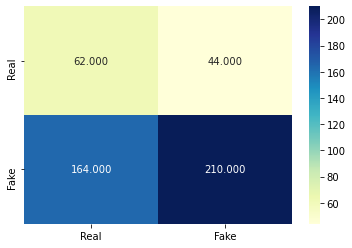

In [67]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(predict3,y_test)
labels=['Real','Fake']
sns.heatmap(cnf_matrix,annot=True,cmap='YlGnBu', fmt='.3f', xticklabels=labels,yticklabels=labels)

In [68]:
x_train=bow_vectorizer.fit_transform(x_train['CleanText'])
x_test=bow_vectorizer.fit_transform(x_test['CleanText'])

IndexError: Index dimension must be <= 2

In [69]:
from sklearn.metrics import scorer

ImportError: cannot import name 'scorer' from 'sklearn.metrics' (C:\Users\Nirob\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)